In [68]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 807.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')


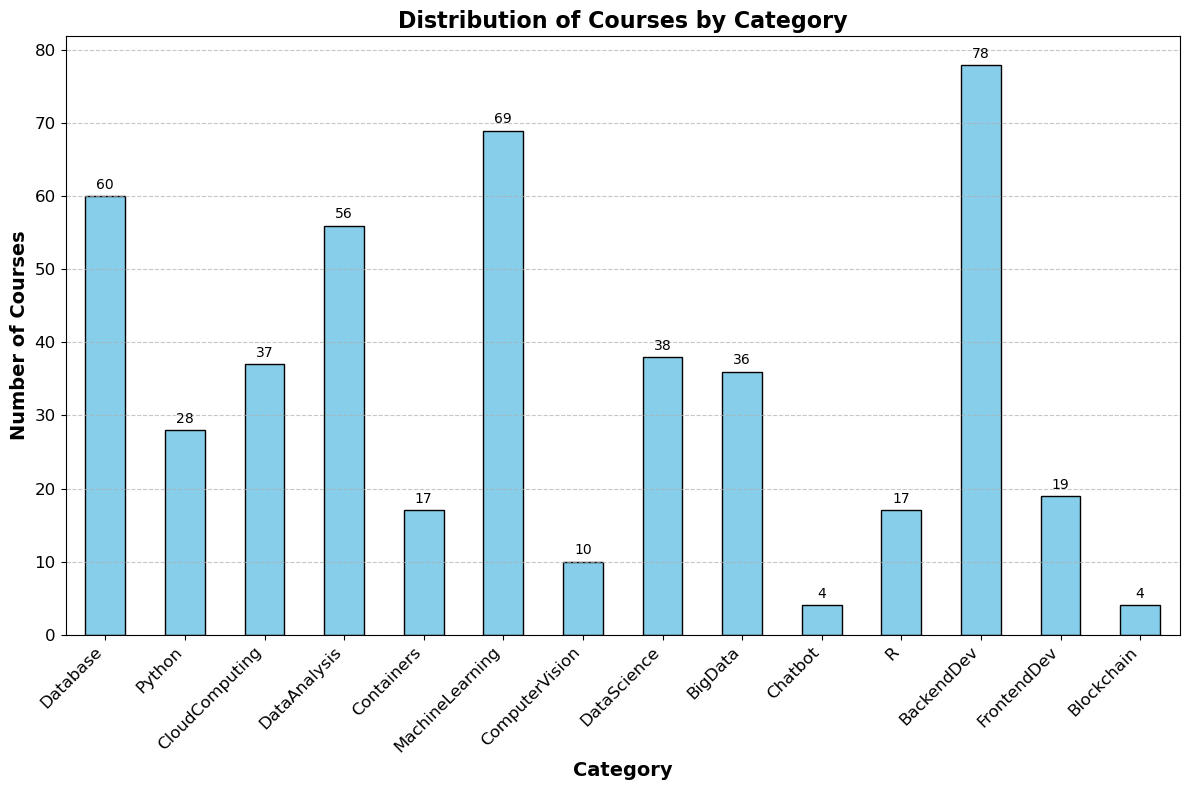

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
df = pd.read_csv(course_genre_url)
print(df.columns)

category_columns = df.columns[2:]  

category_counts = df[category_columns].sum()

plt.figure(figsize=(12, 8))
ax = category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Mejorar la apariencia de la gráfica
plt.title('Distribution of Courses by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Number of Courses', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3)

# Ajustar el espacio de la gráfica
plt.tight_layout()

plt.savefig('distribution_of_courses_by_category.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()


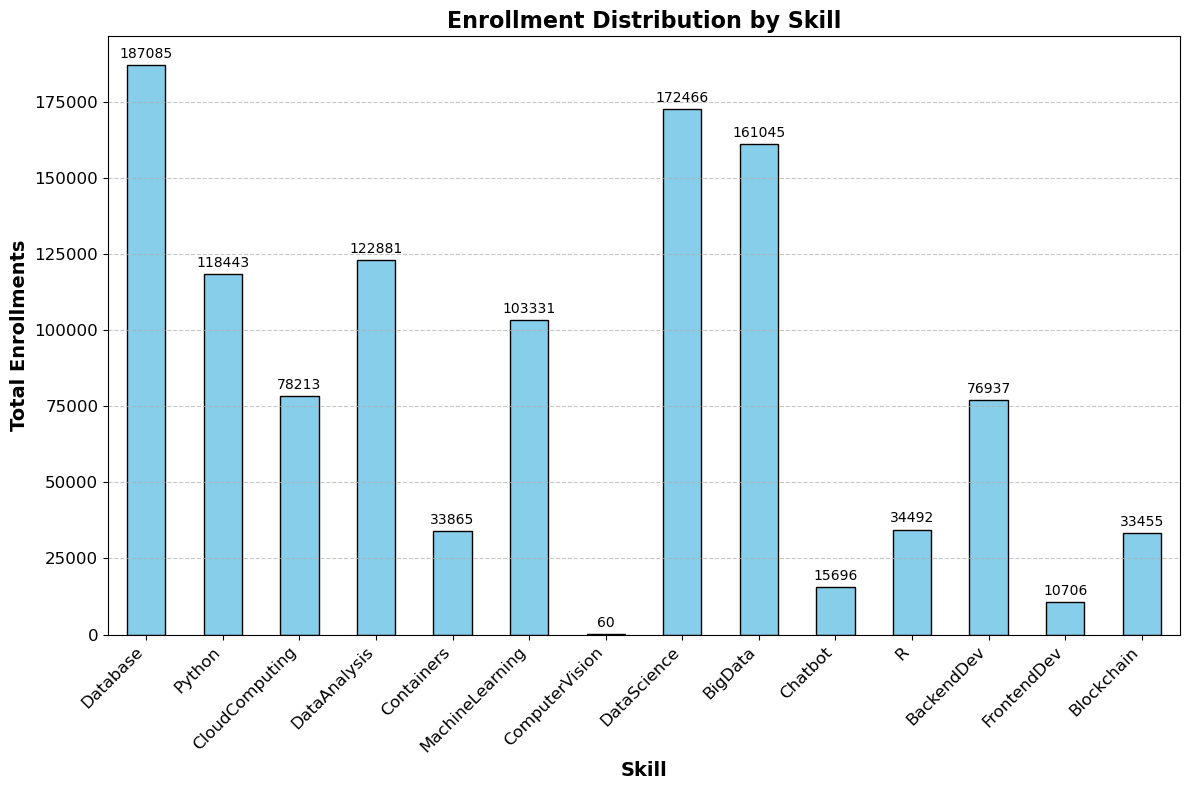

In [18]:
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"

# Using pandas' read_csv function to read the CSV file from the specified URL into a DataFrame
user_profile_df = pd.read_csv(user_profile_url)

# Displaying the first few rows of the DataFrame to inspect its contents
enrollments = user_profile_df.drop(columns=['user']).sum()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
ax = enrollments.plot(kind='bar', color='skyblue', edgecolor='black')

# Mejorar la apariencia de la gráfica
plt.title('Enrollment Distribution by Skill', fontsize=16, fontweight='bold')
plt.xlabel('Skill', fontsize=14, fontweight='bold')
plt.ylabel('Total Enrollments', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3)

# Ajustar el espacio de la gráfica
plt.tight_layout()

# Guardar la gráfica como archivo PNG
plt.savefig('enrollment_distribution_by_skill.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

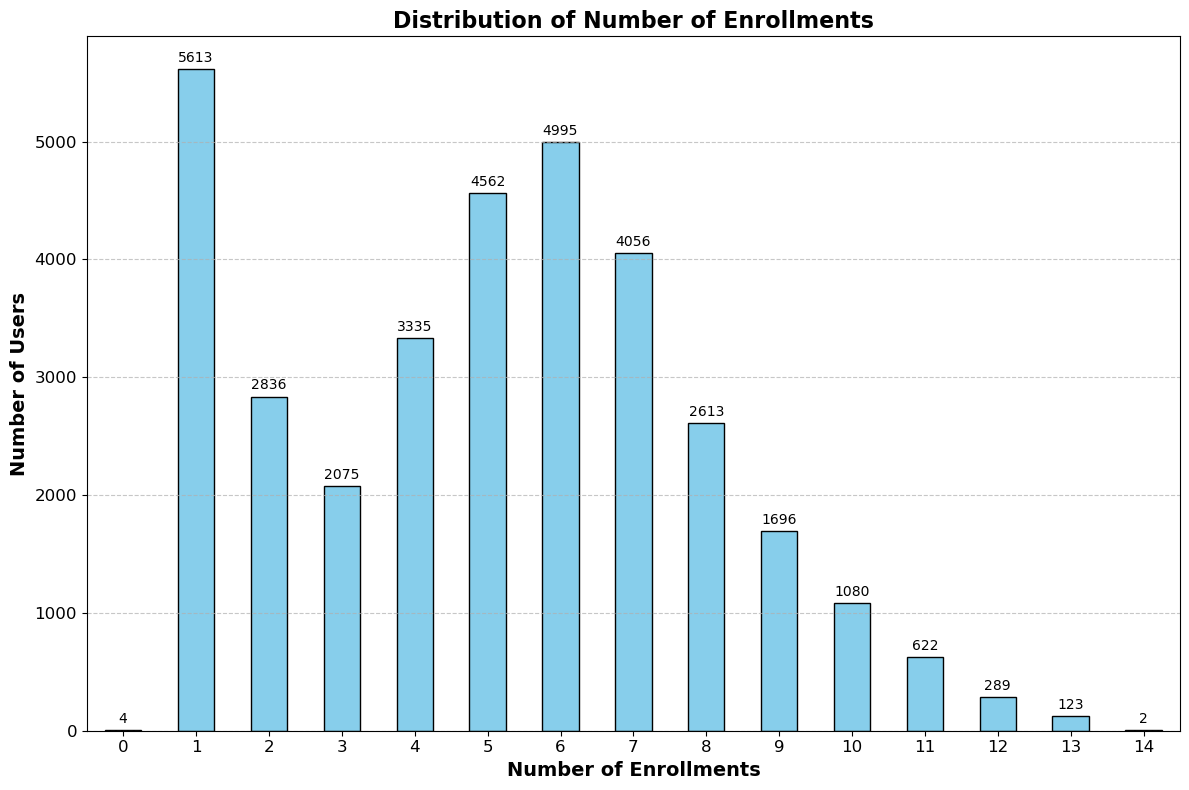

In [21]:
user_profile_df['enrollments'] = user_profile_df.drop(columns=['user']).gt(0).sum(axis=1)

# Contar cuántas personas tienen cada cantidad de inscripciones
enrollment_counts = user_profile_df['enrollments'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
ax = enrollment_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Mejorar la apariencia de la gráfica
plt.title('Distribution of Number of Enrollments', fontsize=16, fontweight='bold')
plt.xlabel('Number of Enrollments', fontsize=14, fontweight='bold')
plt.ylabel('Number of Users', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3)

# Ajustar el espacio de la gráfica
plt.tight_layout()

# Guardar la gráfica como archivo PNG
plt.savefig('enrollment_distribution.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [22]:
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
ratings_df = pd.read_csv(ratings_url)

In [24]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [26]:
top_20 = df.nlargest(20, df.columns[3])

# Mostrar el top 20
print(top_20)


      COURSE_ID                                              TITLE  Database  \
1      ML0122EN                accelerating deep learning with gpu         0   
13     DX0108EN  data science bootcamp with python for universi...         0   
14   GPXX0PICEN  create a cryptocurrency trading algorithm in p...         0   
60       TMP107                  data science bootcamp with python         0   
74   GPXX0YMEEN  launch an ai hotdog detector as a serverless p...         0   
75   GPXX0Q8AEN  exploratory data analysis  eda  with pandas in...         0   
98   GPXX04V3EN  deploy a web server using python and ibm cloud...         0   
100  GPXX0D14EN     build a personal movie recommender with django         0   
155    ML0101EN                       machine learning with python         0   
158  ML0101ENv3                       machine learning with python         0   
161    DA0101EN                          data analysis with python         0   
188    PY0101EN                         

In [33]:
course_rating_counts = ratings_df.groupby('item').size().reset_index()
course_rating_counts.columns = ['COURSE_ID', 'Ratings']
top_courses = course_rating_counts.sort_values(by='Ratings', ascending=False).head(20)
top_courses_with_titles = pd.merge(top_courses, df[['COURSE_ID', 'TITLE']], how='left', left_on='COURSE_ID', right_on='COURSE_ID')
top_courses_with_titles

,COURSE_ID,Ratings,TITLE
0,PY0101EN,14936,python for data science
1,DS0101EN,14477,introduction to data science
2,BD0101EN,13291,big data 101
3,BD0111EN,10599,hadoop 101
4,DA0101EN,8303,data analysis with python
5,DS0103EN,7719,data science methodology
6,ML0101ENv3,7644,machine learning with python
7,BD0211EN,7551,spark fundamentals i
8,DS0105EN,7199,data science hands on with open source tools
9,BC0101EN,6719,blockchain essentials


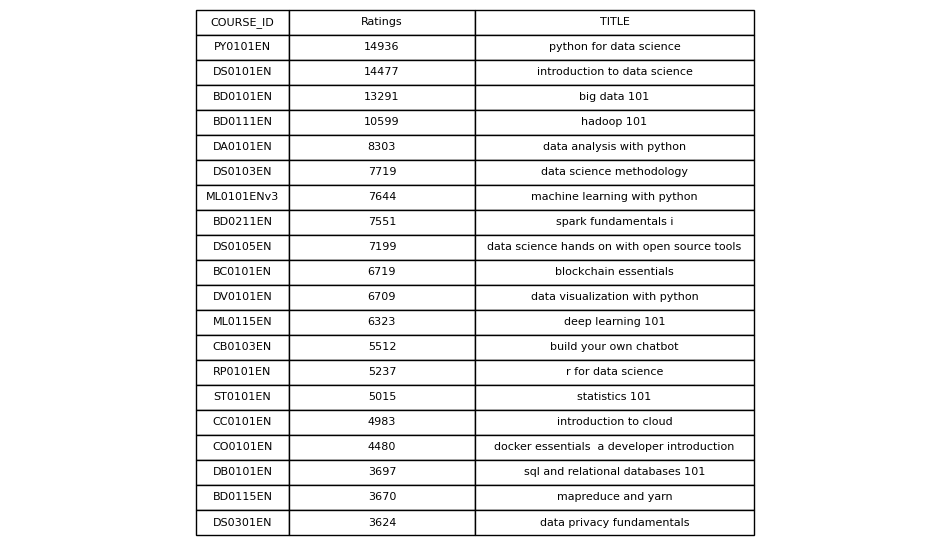

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar el tamaño de la figura

# Ocultar los ejes
ax.axis('tight')
ax.axis('off')

# Crear la tabla a partir del DataFrame
table = ax.table(
    cellText=top_courses_with_titles.values,
    colLabels=top_courses_with_titles.columns,
    cellLoc='center',
    loc='center'
)

# Ajustar la escala de la tabla para mejorar la legibilidad
table.scale(1, 1.5)

# Ajustar el tamaño de la fuente de la tabla
table.auto_set_font_size(False)
table.set_fontsize(8)

# Ajustar el ancho de las columnas manualmente
col_widths = [0.1, 0.2, 0.3, 0.1, 6]  # Ajusta estos valores según la necesidad
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[1] < len(col_widths):  # Limitar a las columnas existentes
        cell.set_width(col_widths[key[1]])

# Guardar la tabla como una imagen PNG
plt.savefig('top_courses_table_adjusted.png', dpi=700, bbox_inches='tight')

# Mostrar la tabla
plt.show()



In [61]:
titles = "".join(title for title in df['TITLE'].astype(str))
titles

'robots are coming  build iot apps with watson  swift  and node redaccelerating deep learning with gpuconsuming restful services using the reactive jax rs clientanalyzing big data in r using apache sparkcontainerizing  packaging  and running a spring boot applicationcloud native security conference  data securitydata science bootcamp with r for university proffesorslearn how to use docker containers for iterative developmentscorm test coursecreate your first mongodb databasetesting microservices with the arquillian managed containercloud pak for integration essentialswatson analytics for social mediadata science bootcamp with python for university professors  advancecreate a cryptocurrency trading algorithm in pythondata   ai essentialssecuring java microservices with eclipse microprofile json web token  microprofile jwt enabling distributed tracing in microservices with zipkinsql access for hadoopybrid cloud conference  ai pipelines labdataops methodologydata   ai  jumpstart your jour

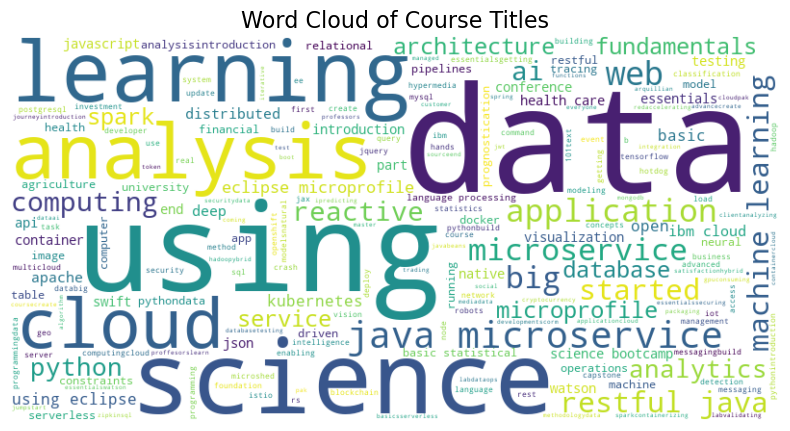

In [71]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Word Cloud of Course Titles', fontsize=16)
plt.show()

wordcloud.to_file("course_titles_wordcloud.png")

C:\Users\Elizabeth\anaconda3\Lib\site-packages\seaborn\_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


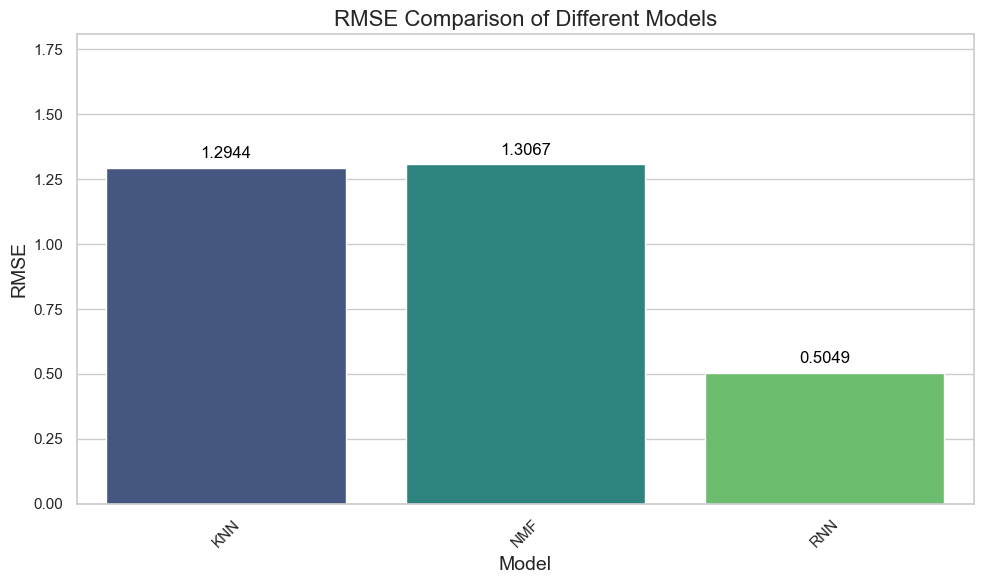

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
models = ['KNN', 'NMF', 'RNN']
rmse_values = [1.2944, 1.3067, 0.5049]

 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

 
ax = sns.barplot(x=models, y=rmse_values, palette="viridis")
 
ax.set_title('RMSE Comparison of Different Models', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
ax.set_ylim(0, max(rmse_values) + 0.5)
plt.xticks(rotation=45)

 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12, color='black')

 
plt.tight_layout()

plt.savefig('rmse_comparison.png', format='png', dpi=300)

plt.show()
